## Gaussian and Laplace pyramid of images

In [1]:
from skimage.io import imread, imshow
from skimage.filters import gaussian
from numpy.fft import fft2, fftshift, ifft2
from skimage import img_as_float, img_as_ubyte, transform
import numpy as np
import matplotlib.pyplot as plt
# from skimage.transform import fftshift
%matplotlib inline

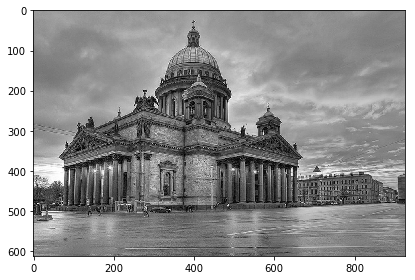

In [2]:
img = imread('palace.jpg', as_grey=True)
imshow(img)

In [3]:
def build_gauss_pyramid(img, sigma, n_layers):
    i1 = fft2(img)
    arr = np.zeros(i1.shape)
    arr[np.int(np.floor(i1.shape[0] // 2)), np.int(np.floor(i1.shape[1] // 2))] = 1
    arr2 = gaussian(arr, sigma = sigma)
    gfilt = fft2(arr2)
    imgs = []
    fouries = []
    imgs.append(img)
    fouries.append(i1)
    for i in range(1, n_layers + 1):
        i1 = abs(gfilt) * i1
        fouries.append(i1)
        imgs.append(abs(ifft2(i1)))
        i = i + 1
    return imgs, fouries

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


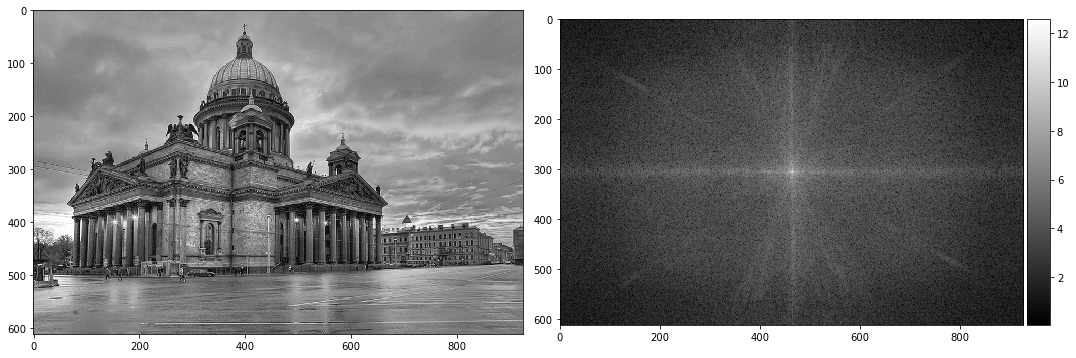

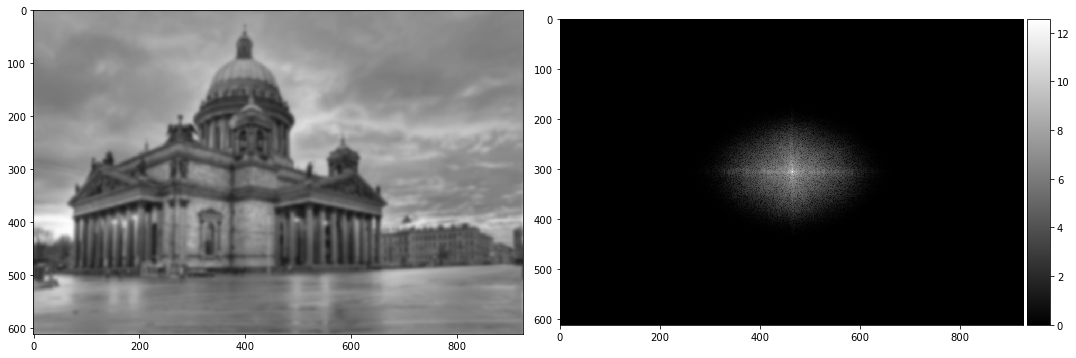

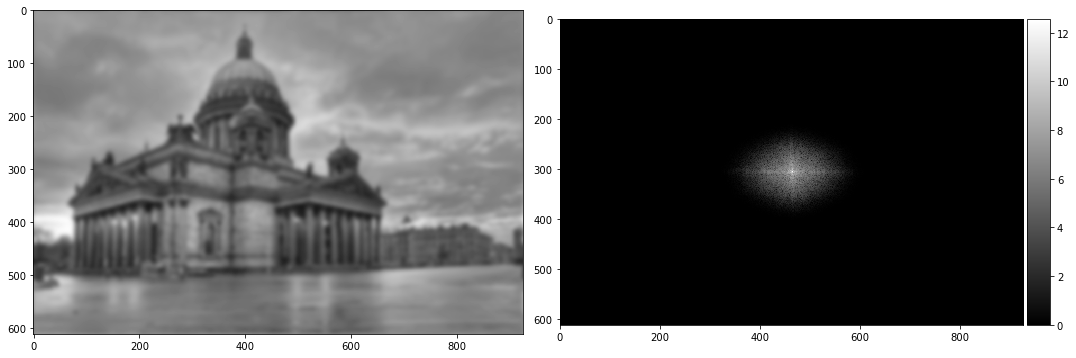

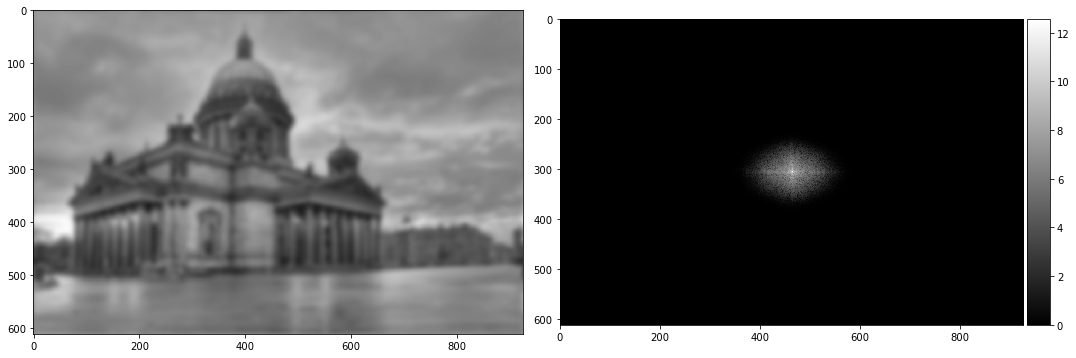

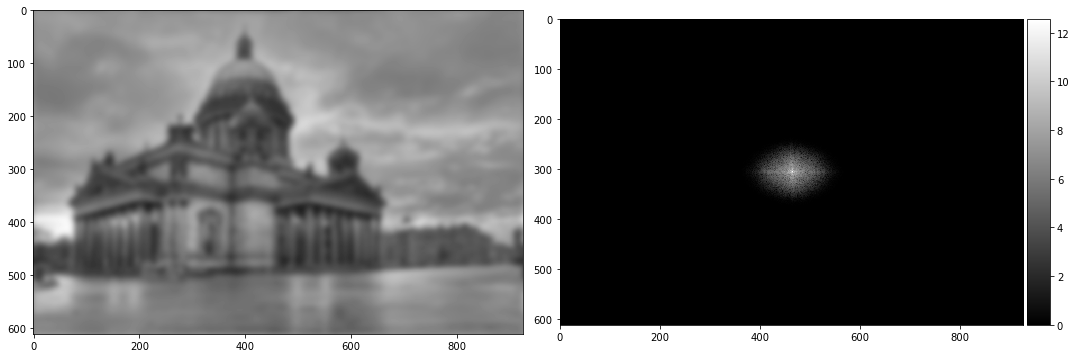

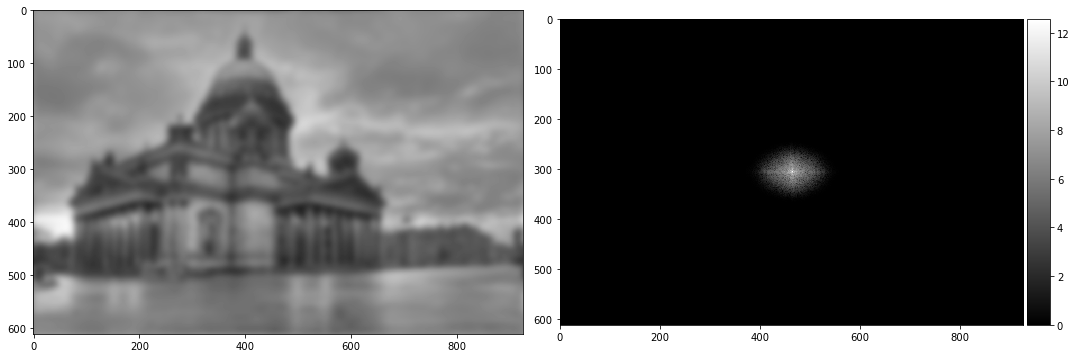

In [20]:
imgs, fouries = build_gauss_pyramid(img, 3, 5)
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[0])
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries[0]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[1])
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries[1]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[2])
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries[2]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[3])
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries[3]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[4])
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries[4]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[5])
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries[5]))), cmap = plt.get_cmap("gray"))

Задание №2. Проведите аналогичные эксперименты с лапласовской пирамидой. Функция для построения лапласовской пирамиды должна использовать функцию построения гауссовской пирамиды и иметь, как и функция гауссовской пирамиды, параметры img, sigma и n_layers.

In [33]:
def build_laplas_pyramid(img, sigma, n_layers):
    imgs, fouries = build_gauss_pyramid(img, 3, 5)
    fouries_lap = []
    i2 = fft2(img)
    nex = i2 - fouries[1]
    fouries_lap.append(nex)
    imgs[0] = abs(ifft2(nex))
    for i in range(2, 6):
        nex2 = fouries[i-1] - fouries[i]
        fouries_lap.append(nex2)
        imgs[i] = abs(ifft2(nex2))
    return imgs, fouries_lap

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


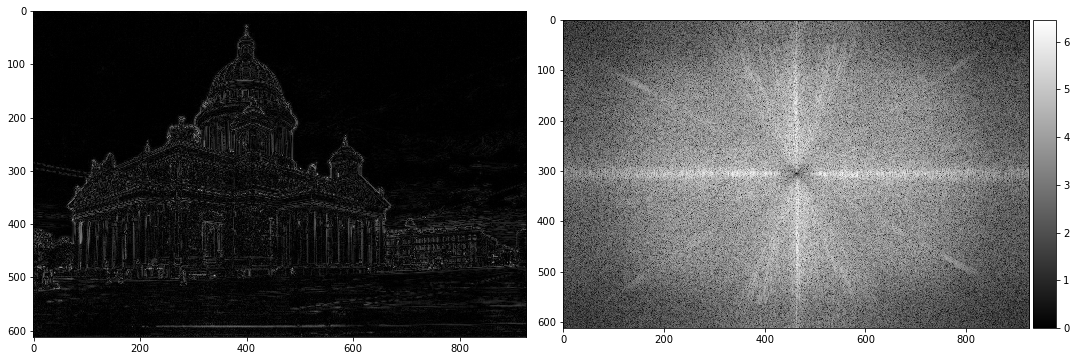

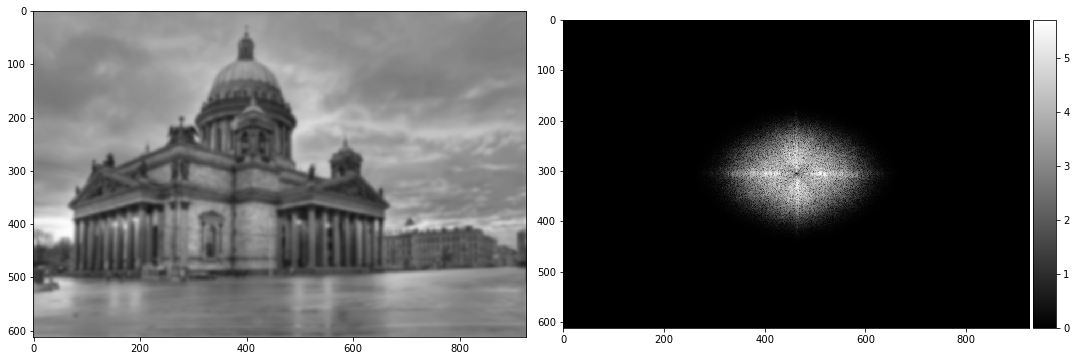

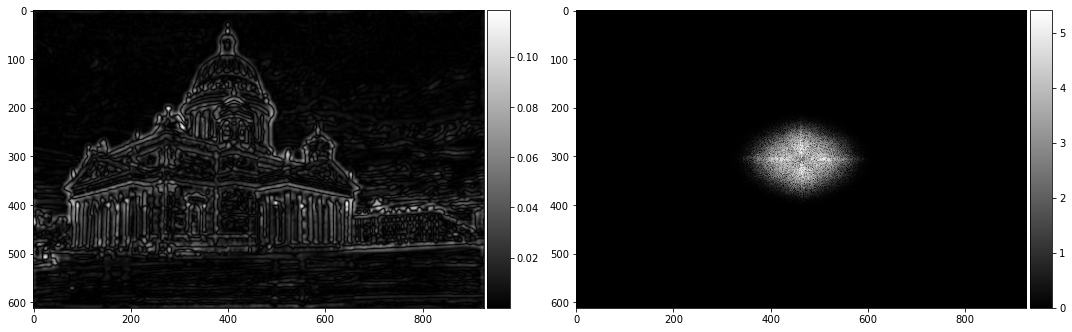

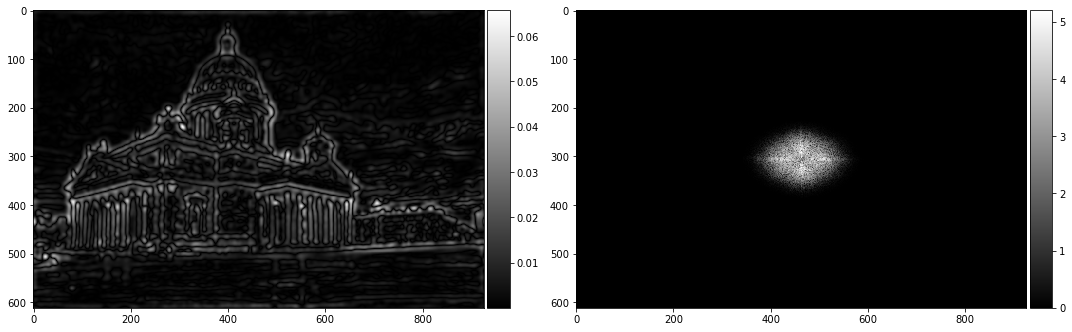

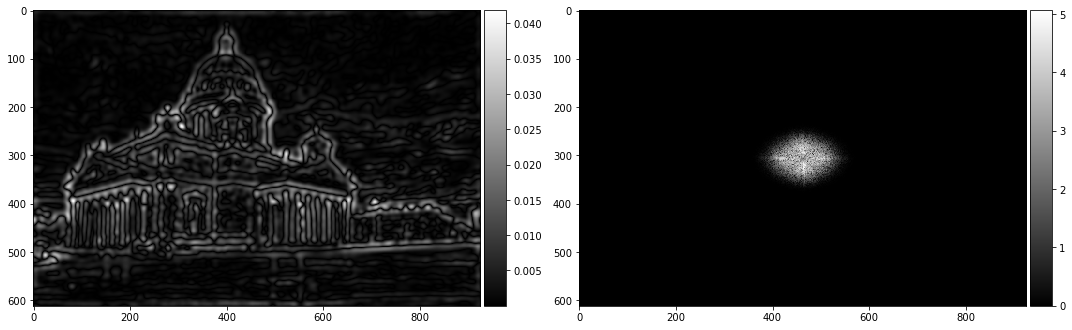

In [44]:
imgs, fouries_lap = build_laplas_pyramid(img, 3, 5)
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[0], cmap = plt.get_cmap("gray"))
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries_lap[0]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[1], cmap = plt.get_cmap("gray"))
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries_lap[1]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[2], cmap = plt.get_cmap("gray"))
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries_lap[2]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[3], cmap = plt.get_cmap("gray"))
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries_lap[3]))), cmap = plt.get_cmap("gray"))
plt.figure(figsize=(15, 10))
plt.subplot(221)
imshow(imgs[4], cmap = plt.get_cmap("gray"))
plt.subplot(222)
imshow(np.log(1 + abs(fftshift(fouries_lap[4]))), cmap = plt.get_cmap("gray"))


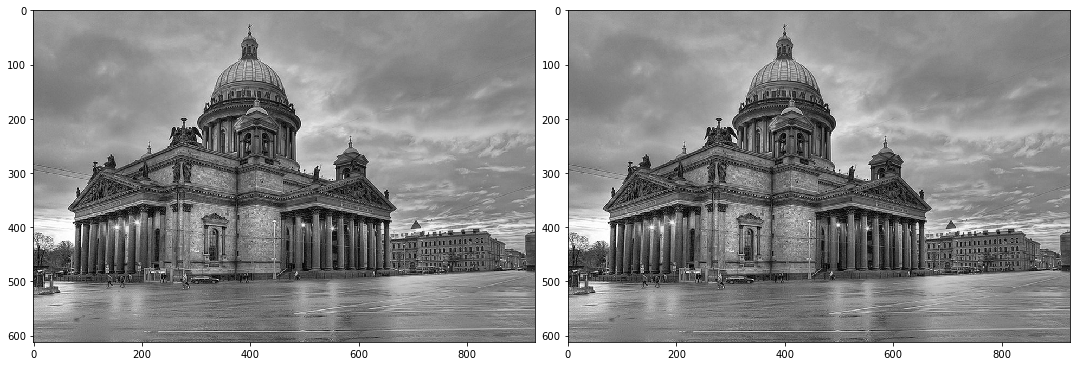

In [35]:
plt.figure(figsize=(15, 10))
tv = fouries[5] + np.sum(fouries_lap, axis=0)
imm = np.clip(abs(ifft2(tv)), 0, 1)
plt.subplot(221)
imshow(imm, cmap = plt.get_cmap("gray"))
plt.subplot(222)
imshow(img)

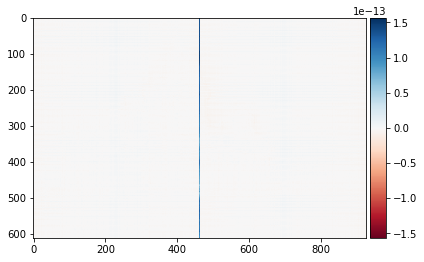

In [42]:
imshow(imm - img)